In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [71]:
plt.rcParams['figure.figsize'] = [14, 8]

def plot_image(img):
    plt.imshow(img)
    plt.show()

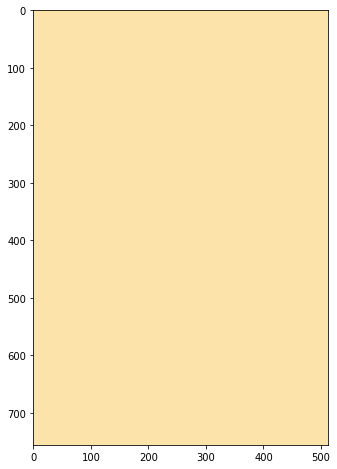

In [178]:
img = np.zeros([756,512,3],dtype=np.uint8)
img[:,:,:] = (np.random.randint(235,255), np.random.randint(205,250), np.random.randint(135,250))
plot_image(img)

In [160]:
BG_COLOR = 209
BG_SIGMA = 5
MONOCHROME = 1


def blank_image(width=512, height=756, background=BG_COLOR):
    """
    It creates a blank image of the given background color
    """
    img = np.full((height, width, MONOCHROME), background, np.uint8)
    return img


def add_noise(img, sigma=BG_SIGMA):
    """
    Adds noise to the existing image
    """
    width, height, ch = img.shape
    n = noise(width, height, sigma=sigma)
    img = img + n
    return img.clip(0, 255)


def noise(width, height, ratio=1, sigma=BG_SIGMA):
    """
    The function generates an image, filled with gaussian nose. If ratio parameter is specified,
    noise will be generated for a lesser image and then it will be upscaled to the original size.
    In that case noise will generate larger square patterns. To avoid multiple lines, the upscale
    uses interpolation.

    :param ratio: the size of generated noise "pixels"
    :param sigma: defines bounds of noise fluctuations
    """
    mean = 0
    assert width % ratio == 0, "Can't scale image with of size {} and ratio {}".format(width, ratio)
    assert height % ratio == 0, "Can't scale image with of size {} and ratio {}".format(height, ratio)

    h = int(height / ratio)
    w = int(width / ratio)

    result = np.random.normal(mean, sigma, (w, h, MONOCHROME))
    if ratio > 1:
        result = cv2.resize(result, dsize=(width, height), interpolation=cv2.INTER_LINEAR)
    return result.reshape((width, height, MONOCHROME))


def texture(image, sigma=BG_SIGMA, turbulence=2):
    """
    Consequently applies noise patterns to the original image from big to small.

    sigma: defines bounds of noise fluctuations
    turbulence: defines how quickly big patterns will be replaced with the small ones. The lower
    value - the more iterations will be performed during texture generation.
    """
    result = image.astype(float)
    cols, rows, ch = image.shape
    ratio = min(cols, rows)
    while not ratio == 1:
        result += noise(cols, rows, ratio, sigma=sigma)
        ratio = (ratio // turbulence) or 1
    cut = np.clip(result, 0, 255)
    return cut.astype(np.uint8)


In [185]:
img_noise = add_noise(blank_image(512, 756), sigma=np.random.randint(2, 5))
img_noise = np.multiply(img, img_noise/255.0).astype(np.uint8)


In [190]:
from augraphy import *

pipeline = default_augraphy_pipeline()
data = pipeline.augment(img_noise)
augmented = data["output"]

In [191]:
cv2.imwrite("test.png", cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

True

In [45]:
rampl = np.linspace(1, 0, 256)
rampl = np.tile(np.transpose(rampl), (512, 1))
rampl = cv2.merge([rampl,rampl,rampl])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


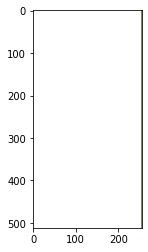

In [46]:
plot_image(img*rampl)